# **Time Series Prediction on Gold Prices**
#### 🧑‍🏫 Author: [Nhi Yen](https://www.linkedin.com/in/yennhi95zz/)
#### 💡I write about Machine Learning on [Medium](https://medium.com/@yennhi95zz) || [Github](https://github.com/yennhi95zz) || [Kaggle](https://www.kaggle.com/nhiyen/code) || [Linkedin](https://www.linkedin.com/in/yennhi95zz/). If you found this article interesting, your support by giving me ⭐ will help me spread the knowledge to others.


## Introduction

This Kaggle project provides code for forecasting the price of gold using various time series forecasting methods. The dataset used for the analysis is the daily price of gold in USD from 1950-01 to 2020-07, with a total of 847 data points. The Jupyter notebook included in the repository contains code for building and evaluating three different time series forecasting models, namely Linear Regression Model, Naive Model, and Exponential Smoothing Model. The Exponential Smoothing Model performed the best with a MAPE score of 17.235%. The predicted gold prices for the period 2020-08 to 2025-02 using the Exponential Smoothing Model are also provided in a CSV file named gold_price_predictions.csv. The dataset, code, and results can be accessed through the Kaggle project and Github repository provided in the references.

**[READ MORE](https://medium.com/@yennhi95zz/time-series-prediction-on-gold-prices-a826fc2ead0c)**



In [6]:
# !pip install pandas-profiling

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Read the CSV file and display the first few rows
df = pd.read_csv('gold_monthly_csv.csv')
print(f"Gold prices data has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The date range of gold prices available is from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df) - 1]}")
df.head()

Gold prices data has 847 rows and 2 columns.
The date range of gold prices available is from 1950-01 to 2020-07


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [8]:
# Create a new dataframe with monthly dates as the index
date_range = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
df['month'] = date_range
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [30]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Gold Price Dataset Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("gold_price_profiling_report.html")

# Display the report in the notebook (if using Jupyter Notebook)
profile.to_notebook_iframe()


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 332.54it/s]


In [9]:
# # Plot the gold prices over time
# plt.figure(figsize=(20,8))
# df.plot(figsize=(20,8))
# plt.title('Gold Price Monthly from 1950 and onwards')
# plt.xlabel('Month')
# plt.ylabel('Price')
# plt.show()

import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add a line trace for the gold prices
fig.add_trace(go.Scatter(x=df.index, y=df['Price'], mode='lines', name='Gold Price'))

# Update layout for the plot
fig.update_layout(
    title='Gold Price Monthly from 1950 and onwards',
    xaxis_title='Month',
    yaxis_title='Price',
    template='plotly_white',
    width=1000,
    height=600
)

# Show the interactive plot
fig.show()


In [10]:
import plotly.express as px

# Prepare the data for Plotly
df_boxplot = df.copy()
df_boxplot['Year'] = df_boxplot.index.year  # Extract the year from the index
df_boxplot = df_boxplot.reset_index()  # Reset the index for easier plotting

# Create the boxplot
fig = px.box(
    df_boxplot, 
    x='Year', 
    y='Price', 
    title='Gold Price Yearly from 1950 and onwards',
    labels={'Year': 'Year', 'Price': 'Gold Price'},
    template='plotly_white',
    width=1200,
    height=600
)

# Adjust layout (rotate x-axis labels for better readability)
fig.update_layout(xaxis=dict(tickangle=90))

# Show the interactive plot
fig.show()


In [11]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


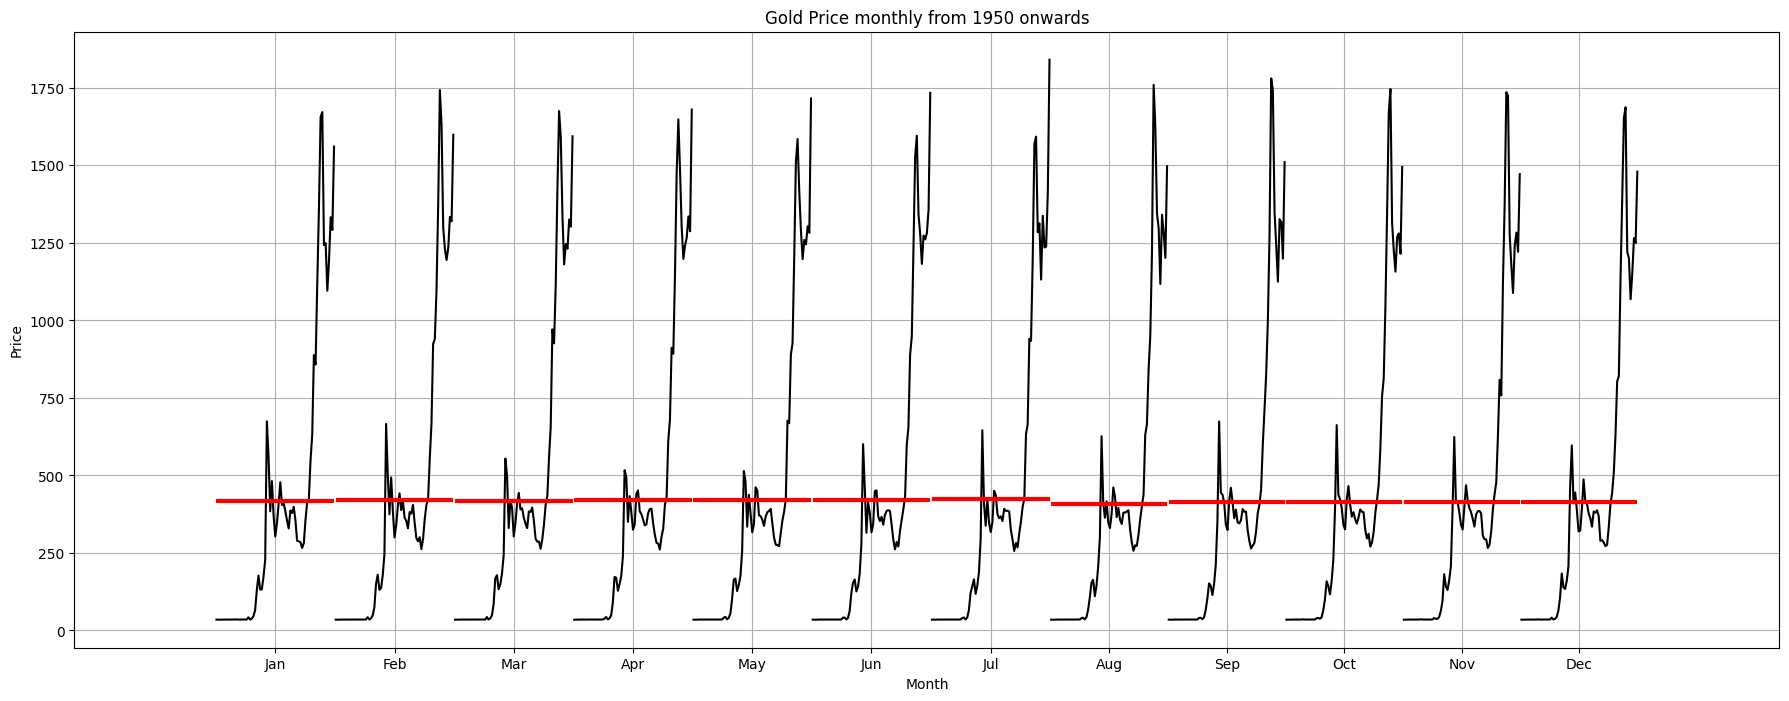

In [12]:
from statsmodels.graphics.tsaplots import month_plot

# Plot the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='Gold Price', ax=ax)
plt.title('Gold Price monthly from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

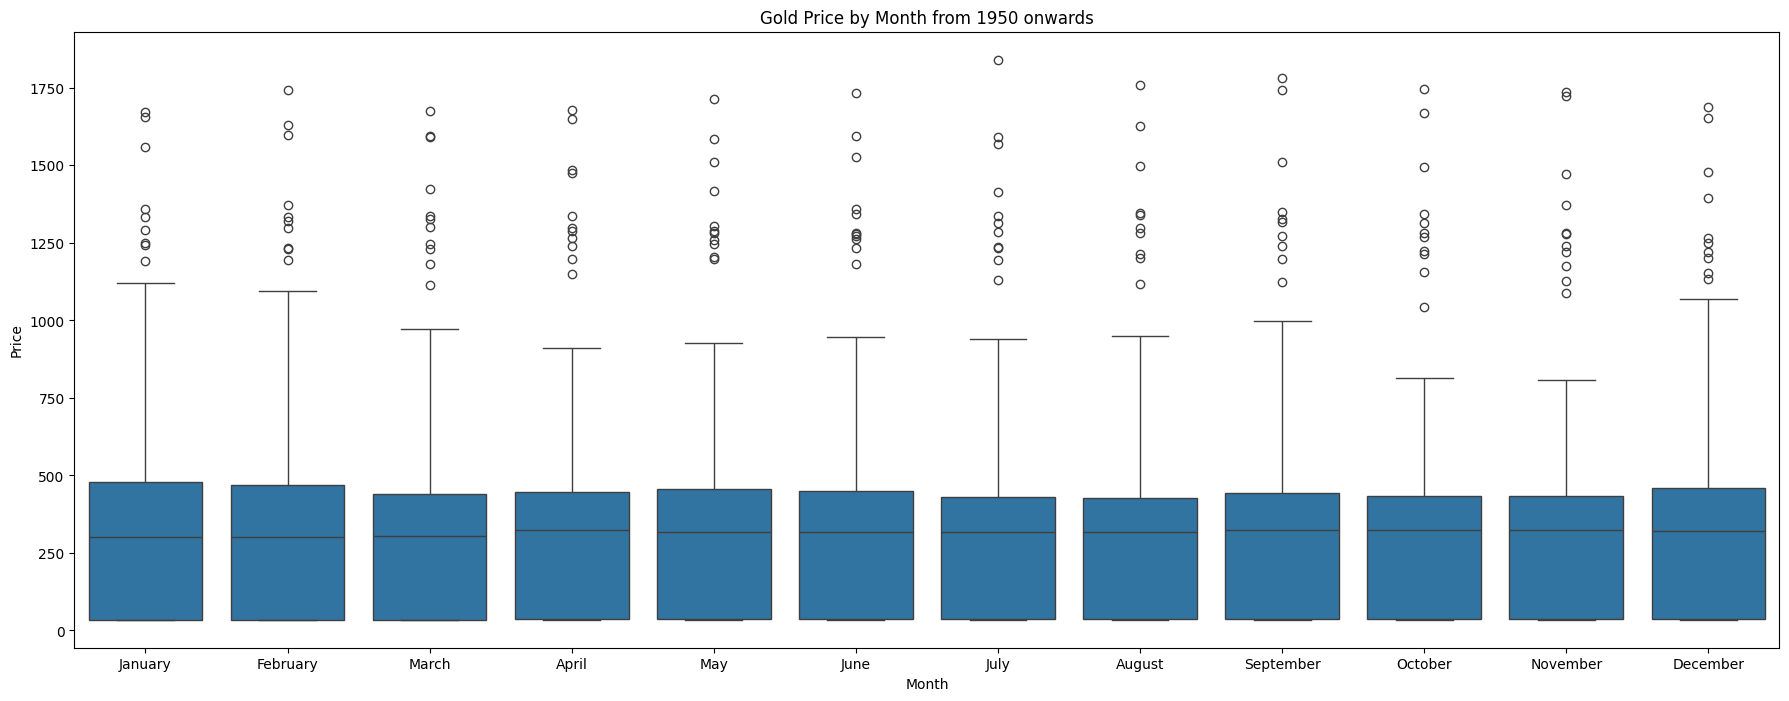

In [13]:
# Create a boxplot of the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold Price by Month from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

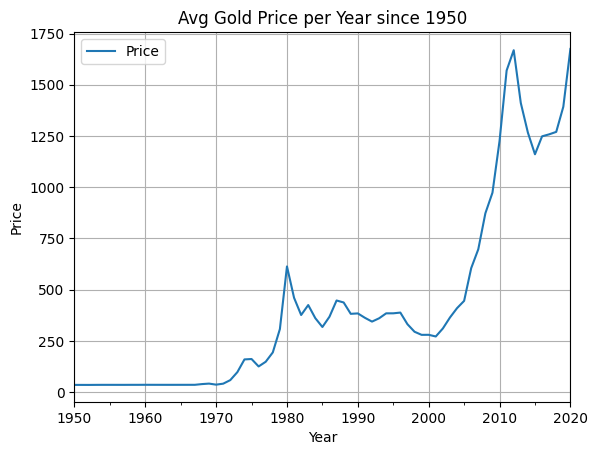

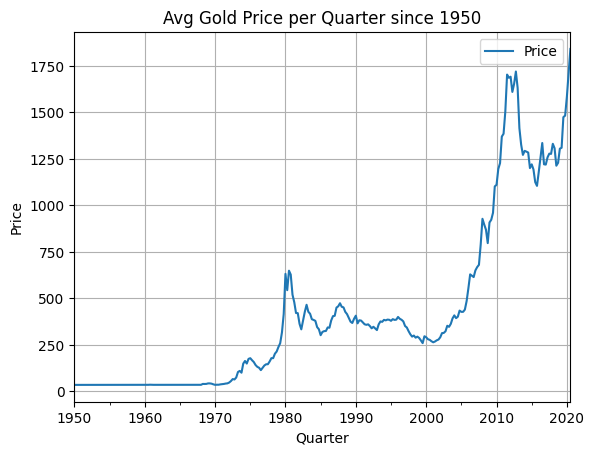

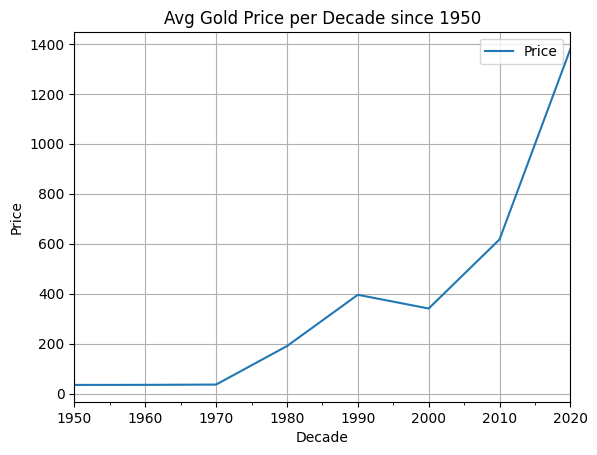

In [14]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Price per Decade since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

In [15]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


The first few rows of the coefficient of variation data:
            Mean       Std  Cov_pct
month                              
1950   34.729167  0.002887     0.01
1951   34.717500  0.020057     0.06
1952   34.628333  0.117538     0.34
1953   34.879167  0.056481     0.16
1954   35.020000  0.082792     0.24


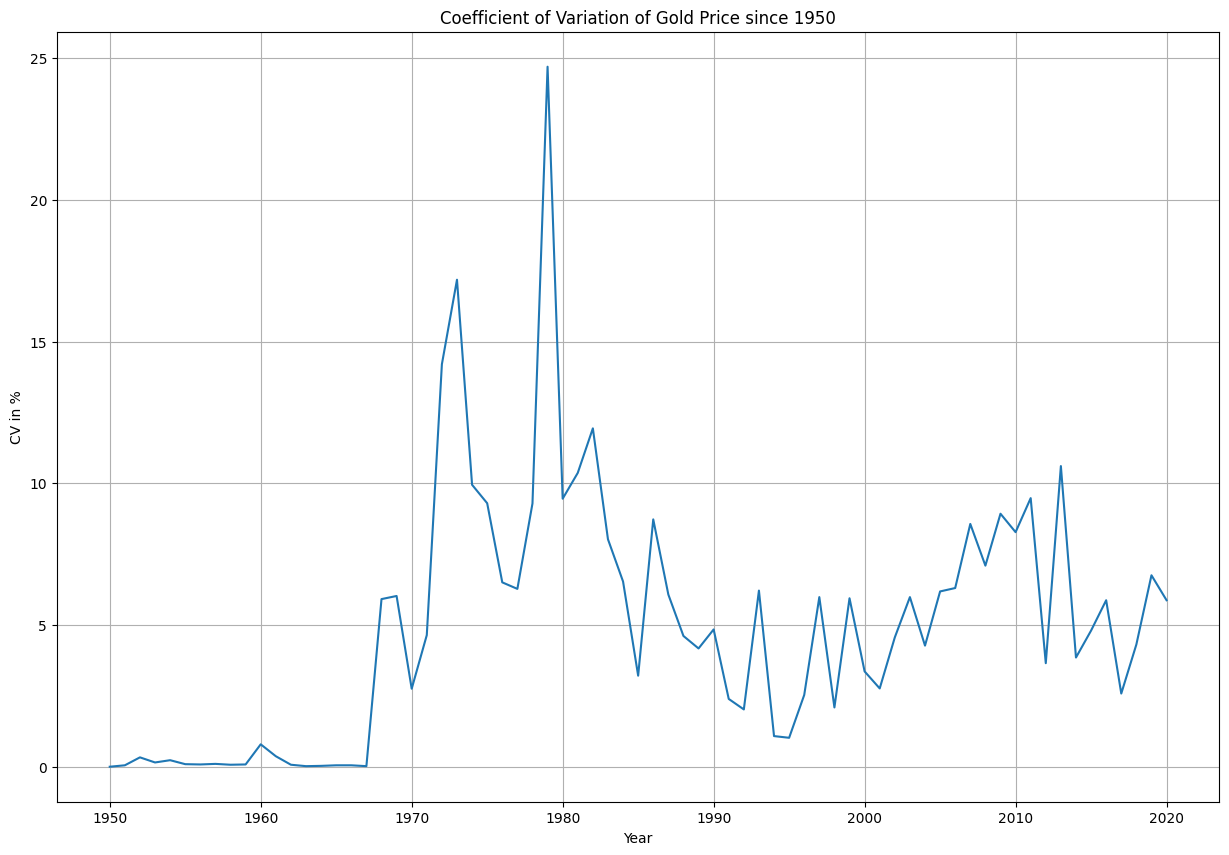

In [16]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Gold Price since 1950')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(df_1.head())

In [17]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]


# Check the shape of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

# It is not necessarily biased to split the data this way. 
# However, it may depend on the specific problem and the goals of the analysis. 
# It is always a good practice to carefully consider the split and to test different split ratios to evaluate their impact on the model performance.

Training set shape: (792, 1)
Testing set shape: (55, 1)
Percentage of data in training set: 93.51 %
Percentage of data in testing set: 6.49 %


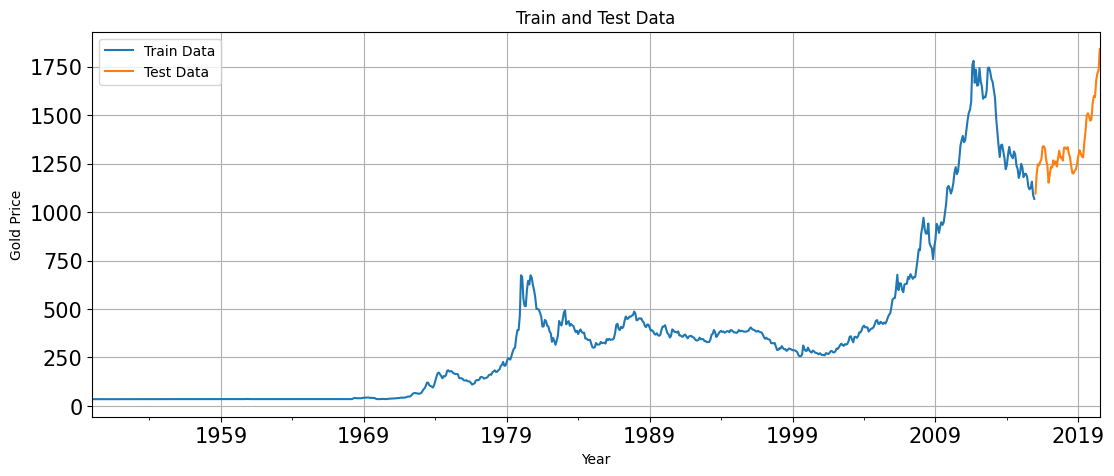

In [18]:
# Plot train and test data
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()


In [19]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

Train time series length: 792
Test time series length: 55


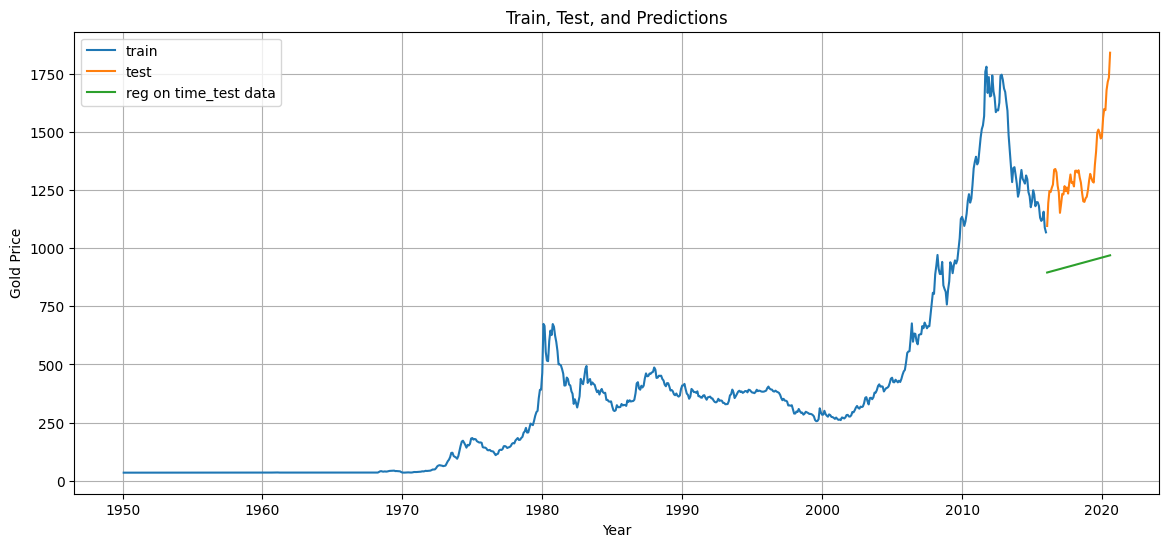

In [20]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [21]:
def mape(y_true, y_pred):
    """Calculate mean absolute percentage error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 29.760%


In [22]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test MAPE (%)
Regression on Time,29.759658


In [23]:
# Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['Price']) [len(np.asarray(train['Price'])) - 1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

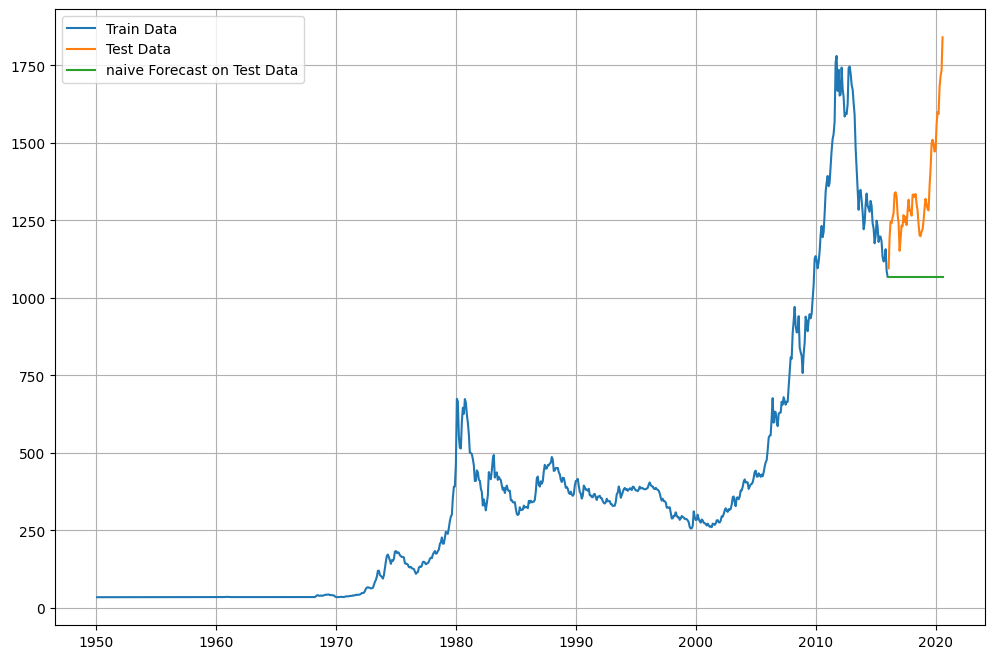

In [24]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train Data')
plt.plot(test['Price'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

In [25]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results

MAPE for naive Forecast model is 19.385%


,Test MAPE (%)
Regression on Time,29.759658
naiveForecast,19.384586


In [26]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE of final model: %.3f%%' % mape_final_model)

MAPE of final model: 17.235%


In [27]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})
# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True, index_label='Month') 

print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235
2021-01-31,1514.417601,1622.568574,1730.719546
2021-02-28,1545.352396,1653.503369,1761.654341
2021-03-31,1556.764378,1664.915350,1773.066323
2021-04-30,1648.309829,1756.460802,1864.611774
2021-05-31,1694.225915,1802.376887,1910.527859


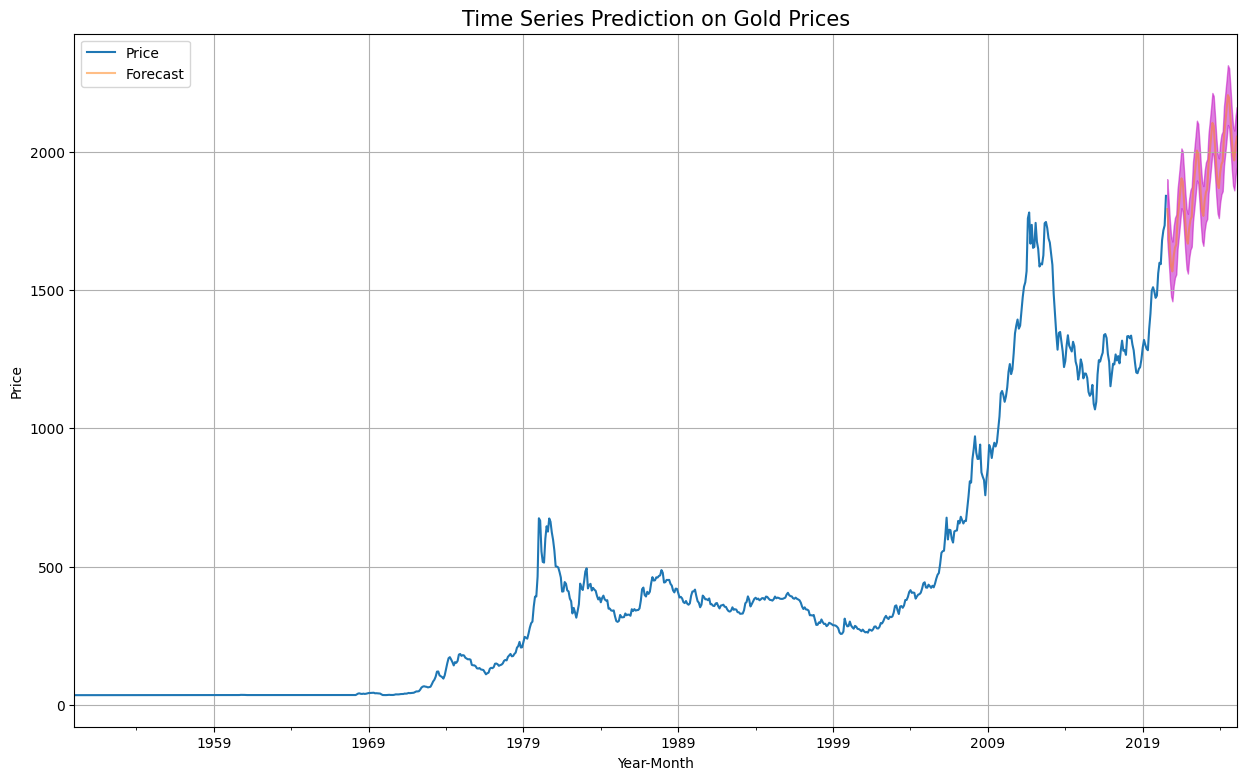

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot actual and predicted values with confidence intervals
axis = df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

# Save plot as png
plt.savefig('gold_price_predictions.png')

## References
- Kaggle Dataset: [Monthly Gold Price](https://www.kaggle.com/datasets/nhiyen/monthly-gold-price)
- Github Repo - [HERE](https://github.com/yennhi95zz/predict-gold-prices)
- Kaggle Project - [HERE](https://www.kaggle.com/nhiyen/time-series-prediction-on-gold-prices)
- Detail Explanation about the code on [MEDIUM]([https://medium.com/@yennhi95zz/unleashing-the-power-of-e-commerce-sales-analysis-a-case-study-4c64871a86ee](https://medium.com/@yennhi95zz/time-series-prediction-on-gold-prices-a826fc2ead0c))